In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv("Data/adult_mortality_by_country.csv",header=1)
mortality=data.drop(columns=['Male','Female'])
mortality=mortality.rename(columns={"Both sexes": "mortality_rate"})
mortality['mortality_rate'].describe()
mortality['Year']=pd.to_datetime(mortality['Year'],format='%Y')

#medical doctors
data=pd.read_csv("Data/medical_doctors.csv")
doctors=data.drop(data.columns[[3,4,5,6]], axis=1)
doctors['Year']=pd.to_datetime(doctors['Year'],format='%Y')
doctors=doctors.rename(columns={"Medical doctors (per 10 000 population)": "medical_doctors"})
merged_data = pd.merge(left=mortality, right=doctors,on=['Country', 'Year'])

#bed density
data=pd.read_csv("Data/hospital_bed_density.csv")
hospital_beds=data
hospital_beds['Year']=pd.to_datetime(hospital_beds['Year'],format='%Y')
hospital_beds=hospital_beds.rename(columns={"Hospital beds (per 10 000 population)": "hospital_beds"})
merged_data = pd.merge(left=merged_data, right=hospital_beds,on=['Country', 'Year'])

#pharmaceutical_personnel
data=pd.read_csv("Data/pharmaceutical_personnel.csv")
pharma=data
pharma=pharma.drop(columns=["Pharmacists (number)","Pharmaceutical Technicians and Assistants (number)"])
pharma['Year']=pd.to_datetime(pharma['Year'],format='%Y')
pharma=pharma.rename(columns={"Pharmacists  (per 10 000 population)": "Pharmacists"})
merged_data = pd.merge(left=merged_data, right=pharma,on=['Country', 'Year'])

#che
data=pd.read_csv("Data/current_health_expenditure.csv",header=1)
che=pd.melt(data, id_vars=['Country'],var_name="Year", value_name="Value")
che=che.sort_values(by=['Country'])
che['Year']=pd.to_datetime(che['Year'],format='%Y')
che=che.rename(columns={"Value": "Che"})
merged_data = pd.merge(left=merged_data, right=che,on=['Country', 'Year'])

In [31]:
merged_data

,Country,Year,mortality_rate,medical_doctors,hospital_beds,Pharmacists,Che
0,Afghanistan,2016-01-01,245,2.782,5.0,0.473,61.5
1,Afghanistan,2015-01-01,233,2.850,5.0,0.497,60.1
2,Afghanistan,2014-01-01,234,2.983,5.0,0.513,60.1
3,Afghanistan,2012-01-01,242,2.414,5.3,0.271,52.2
4,Afghanistan,2011-01-01,248,2.518,4.4,0.278,51.6
...,...,...,...,...,...,...,...
919,Viet Nam,2010-01-01,132,7.100,29.1,2.671,78.2
920,Viet Nam,2005-01-01,137,6.139,23.4,1.800,34.8
921,Yemen,2014-01-01,226,5.251,7.1,1.052,79.7
922,Yemen,2004-01-01,248,3.449,5.9,0.473,38.2


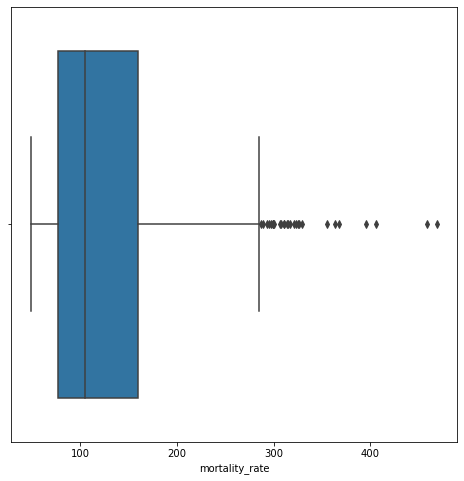

In [32]:
fig, ax= pyplot.subplots(figsize=(8,8))
sns.boxplot(x="mortality_rate", data=merged_data, ax=ax)

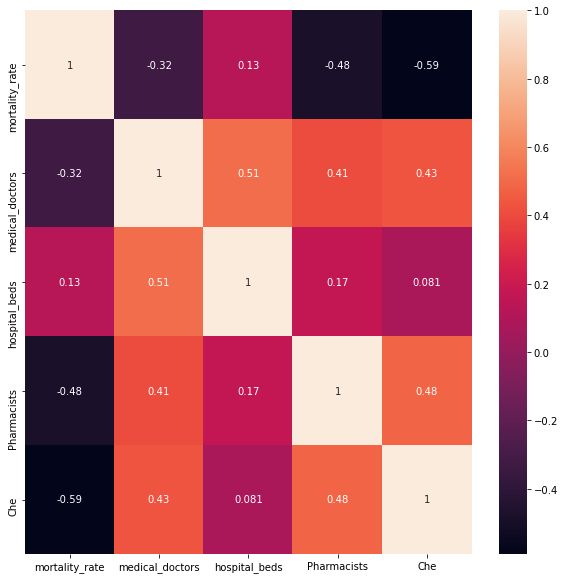

In [33]:
fig, ax= pyplot.subplots(figsize=(10,10))
sns.heatmap(merged_data.corr(),annot=True)

In [37]:
np.isnan(merged_data['medical_doctors']).any()

True

In [40]:

null_data = merged_data[merged_data.isnull().any(axis=1)]

In [41]:
null_data

,Country,Year,mortality_rate,medical_doctors,hospital_beds,Pharmacists,Che
10,Afghanistan,2001-01-01,307,1.899,3.9,0.243,NaN
198,Cuba,2014-01-01,95,75.673,51.6,NaN,856.0
199,Cuba,2013-01-01,96,74.183,50.5,NaN,705.2
200,Cuba,2012-01-01,96,72.901,50.4,NaN,597.6
381,Indonesia,2010-01-01,187,1.395,5.7,NaN,92.2
514,Libya,2015-01-01,147,18.943,37.0,4.856,NaN
515,Libya,2014-01-01,137,20.583,37.0,6.174,NaN
552,Mexico,2000-01-01,138,19.808,10.5,NaN,309.6
608,Pakistan,2015-01-01,166,9.262,6.0,NaN,37.9
689,Russian Federation,2011-01-01,237,NaN,94.2,0.569,684.8
